In [93]:
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploratory data analysis (EDA) and Preprocessing

First, explore and make a description of features without modification, check for distributions, correlations, issues, patterns, etc.

Once analyzed the issues on numerical and categorical features, the next step is to modify their values appropiately.

### Read dataset

In [94]:
import tools.eda as eda
import tools.preprocess as prep

# url = 'https://raw.githubusercontent.com/gusseppe/master_artificial_intelligence/master/Introduction_to_Machine_Learning/deliverables/work1/iml/datasets/cmc.arff'
path = 'datasets/cmc.arff'
df = eda.read_arff(path_data=path) # local
# df = eda(path_data='datasets/cmc.arff') # local
df.head()

wage weducation heducation  children wreligion wworking hoccupation  \
0  24.0       b'2'       b'3'       3.0      b'1'     b'1'        b'2'   
1  45.0       b'1'       b'3'      10.0      b'1'     b'1'        b'3'   
2  43.0       b'2'       b'3'       7.0      b'1'     b'1'        b'3'   
3  42.0       b'3'       b'2'       9.0      b'1'     b'1'        b'3'   
4  36.0       b'3'       b'3'       8.0      b'1'     b'1'        b'3'   

  living_index media_exposure class  
0         b'3'           b'0'  b'1'  
1         b'4'           b'0'  b'1'  
2         b'4'           b'0'  b'1'  
3         b'3'           b'0'  b'1'  
4         b'2'           b'0'  b'1'

In [95]:
cat_features = ['weducation','heducation', 'wreligion', 
'wworking', 'hoccupation', 'living_index', 'media_exposure']

splits, metadata = eda.split(df, cat_features=cat_features,
                    response='class')
X_num = splits['X_num']
X_cat = splits['X_cat']

X_num.head()

wage  children
0  24.0       3.0
1  45.0      10.0
2  43.0       7.0
3  42.0       9.0
4  36.0       8.0

### Metadata


In [96]:
metadata

{'n_num_features': 2,
 'n_cat_features': 7,
 'n_instances': 1473,
 'n_features': 9,
 'dtypes': {'wage': dtype('float64'),
  'weducation': dtype('int64'),
  'heducation': dtype('int64'),
  'children': dtype('float64'),
  'wreligion': dtype('int64'),
  'wworking': dtype('int64'),
  'hoccupation': dtype('int64'),
  'living_index': dtype('int64'),
  'media_exposure': dtype('int64'),
  'class': dtype('int64')}}

### Analyze and preprocess


#### Check null values

There are no NaN values.

In [97]:
print(f'Numerical: {eda.check_null(X_num)}')
print(f'Categorical: {eda.check_null(X_cat)}')

Numerical: wage        0
children    0
dtype: int64
Categorical: weducation        0
heducation        0
wreligion         0
wworking          0
hoccupation       0
living_index      0
media_exposure    0
dtype: int64


#### Check shape distributions

**Histogram**

In the following histogram plot, we can observe that the 'children' feature is skewed to the left, whereas, the 'wage' features is almost similar to a normal distribution.

From this plot we can conclude that, most likely, a function might be applied to 'children' feature to normalize it.

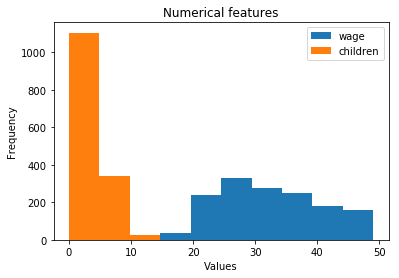

In [98]:
import matplotlib.pyplot as plt 
import seaborn as sns

X_num.plot(kind='hist')
plt.title('Numerical features')
_ = plt.xlabel("Values")
plt.show()

**Boxplot**

As depicted in the boxplot, we can see that there are some outliers in the 'children' feature, likely to be removed later. Furthermore, we can observe that the 'wage' feature is well shaped, it means, similar to a gaussian/normal distribution.

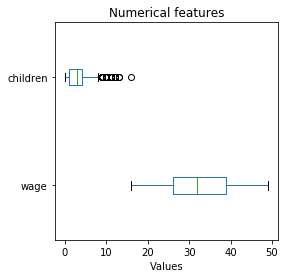

In [99]:
_ = X_num.plot(kind='box',figsize=(4, 4), vert=False)
plt.title('Numerical features')
_ = plt.xlabel("Values")
plt.show()


**Scatterplot**

Using a scatterplot we can find out clusters or groups that appear when plotting two numerical features. However, in this case, this plot does not bring so much information because all the points belong, apparently, to a one cluster. We expect it to has 3 clusters. Nonetheless, we need to analyze also the remaining features (the categorical ones). 

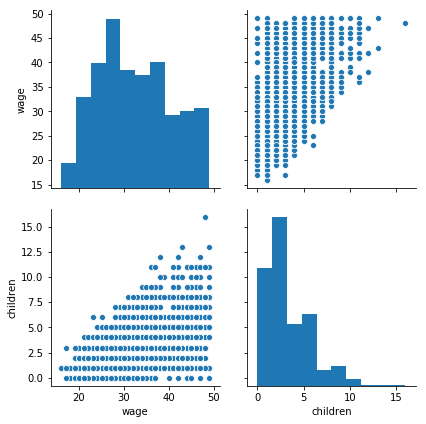

In [100]:
_ = sns.pairplot(X_num, height=3)
plt.show()

**Correlation matrix**

Let's see if the numerical variables are correlated using Pearson metric (for numerical features).

The usefullness of finding out correlated features and remove them have some benefits:

- Avoid the curse of dimensionality: less features lead to faster training and less complex models.

- Avoid multicollinearity:  For most linear models, having correlated features leads to overfitting and numerical inacurrate results due to redundancy.

As Occam'razer stated: among several solutions for a problem, we should pick the simpler one.

On the other hand, there are some scenarios when removing correlated features is not good.

- For interpretation: the more variables, the better explanation the model can yield.

- Bayes-based models: Due to the nature of bayes theorem, that one random variable can depend of previous variables leads to dependency among features, so that having correlated variables is fine.

- Regression problems: In regression models we need highly correlated features with the target. Removing one of them can decrease the performance drastically.


Sources:

https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity

https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features


In this case, both variables are correlated but with less intensity (< 70%), and also due to the importance of these two variables (only 2 out o
f 9 numerical features), both are kept.

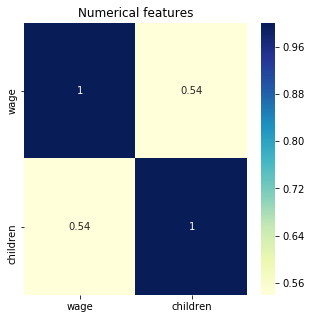

In [101]:
f = plt.figure(figsize=(5, 5))
corr = X_num.corr(method='pearson')

plt.title('Numerical features')
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

#### Remove outliers

Some clustering algorithms are not robuts to outliers because
they are distance-based models.

In [102]:
# Take care of NAN values
import numpy as np
from scipy import stats

print(f' # samples before: {len(X_num)}')
rows_to_remove = (np.abs(stats.zscore(X_num)) < 3).all(axis=1)
X_num = X_num[rows_to_remove]
print(f' # samples after: {len(X_num)}')
X_num.head()

 # samples before: 1473
 # samples after: 1455


wage  children
0  24.0       3.0
1  45.0      10.0
2  43.0       7.0
3  42.0       9.0
4  36.0       8.0

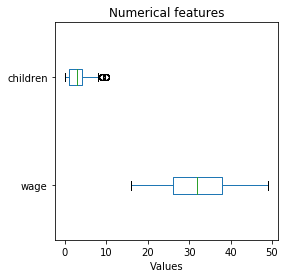

In [103]:
_ = X_num.plot(kind='box',figsize=(4, 4), vert=False)
plt.title('Numerical features')
_ = plt.xlabel("Values")
plt.show()

#### Scaling


Many supervised linear ML models expect features to have a normal distribution (0 mean and unit variance) because if a feature has a different variance and centre, it will dominate and affect the others, making the models unable to learn uniformally across the remaining features. However, unsupervised models expect features to have the same range, it means, the same scale when dealing with distances. When there is a lack of scaling, the distances are not comparable.

In [104]:
X_num_scaled = prep.scale(X_num)
X_num_scaled.head()

wage  children
0 -1.028389 -0.072187
1  1.542794  3.152485
2  1.297919  1.770483
3  1.175482  2.691817
4  0.440858  2.231150

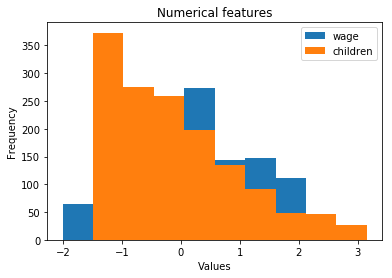

In [105]:
import matplotlib.pyplot as plt 
import seaborn as sns

X_num_scaled.plot(kind='hist')
plt.title('Numerical features')
_ = plt.xlabel("Values")
plt.show()

### Analyze and preprocess the categorical features

#### Check the levels on each feature

Let's examine how many levels each categorical feature has. For instance, in the **wreligion** feature, there are 1253 women that are islamists, and 220 that don't. It means that the dataset is biased on religion; that is, 1253 out of 1473 are Islamists, about 85% of the total data. Those values are important when interpreting the results later.

In addition, the variables **heducation** and **hoccupation** have the level=1 with %3 of total values and level=4 with 2% of total values, respectively. Indicating that those levels will lead to a sparse column (mostly zeros) when one-hot-encoding method is performed. As a result, it will increase noise in the way that this new column will be linearly dependent with the others columns:

$$ 0.\textbf{v}+0.\textbf{w}+1.\textbf{0}=\textbf{0}$$

Therefore, this new feature (column) will be soft-correlated with others, hence, the remaining features can be expressed by the linear combination of this new feature, which is redundant.

One approach to avoid this is removing that level and move its values to any level that makes sense.

For instance, in the feature: **heducation**, the level=1 (low education) should be moved to level=2 (almost low education). This is so because **heducation** is an ordinal feature, so it makes more sense to move the level=1 to level=2 because of intensity. However, **hoccupation** is a nominal feature, so that, it makes more sense to move the level=4 to level=3, which is the level with more instances, probably meaning the most common job.


#### Remove the samples (numerical outliers) also in the X_cat.

In [106]:
X_cat = X_cat[rows_to_remove]
len(X_cat)

1455

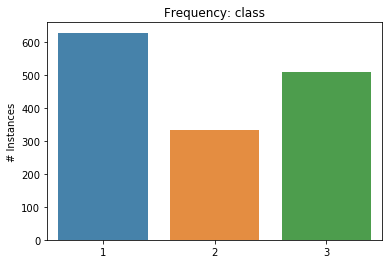

value  freq     %
    1   629  0.43
    3   511  0.35
    2   333  0.23
------------------------------


In [107]:
eda.analyze_cat(splits['y'])

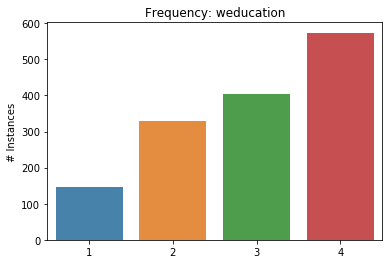

value  freq     %
    4   574  0.39
    3   404  0.28
    2   330  0.23
    1   147  0.10
------------------------------


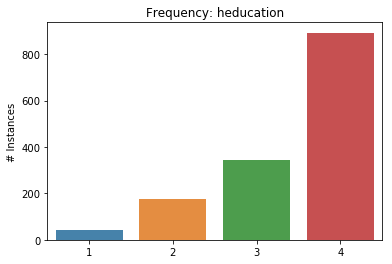

value  freq     %
    4   892  0.61
    3   345  0.24
    2   175  0.12
    1    43  0.03
------------------------------


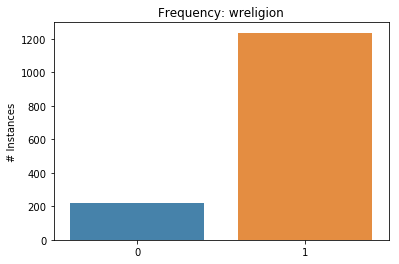

value  freq     %
    1  1236  0.85
    0   219  0.15
------------------------------


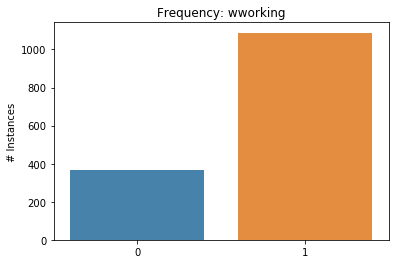

value  freq     %
    1  1088  0.75
    0   367  0.25
------------------------------


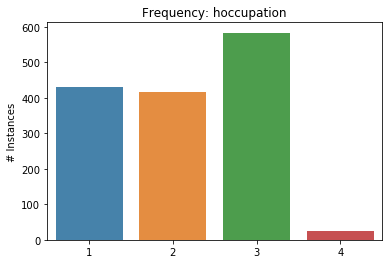

value  freq     %
    3   583  0.40
    1   429  0.29
    2   417  0.29
    4    26  0.02
------------------------------


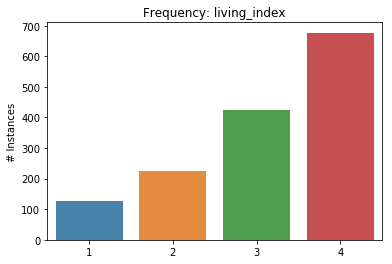

value  freq     %
    4   677  0.47
    3   425  0.29
    2   226  0.16
    1   127  0.09
------------------------------


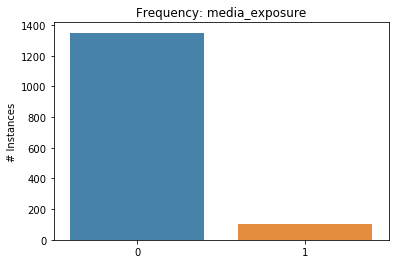

value  freq     %
    0  1350  0.93
    1   105  0.07
------------------------------


In [108]:
eda.analyze_cat(X_cat)

#### Remove levels with few levels

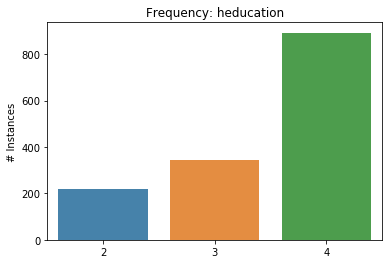

value  freq     %
    4   892  0.61
    3   345  0.24
    2   218  0.15
------------------------------


In [109]:
import pandas as pd
pd.options.mode.chained_assignment = None

X_cat.loc[X_cat['heducation'] == 1, 'heducation'] = 2
eda.analyze_cat(X_cat[['heducation']])

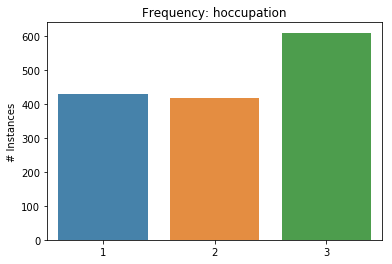

value  freq     %
    3   609  0.42
    1   429  0.29
    2   417  0.29
------------------------------


In [110]:
X_cat.loc[X_cat['hoccupation'] == 4, 'hoccupation'] = 3
eda.analyze_cat(X_cat[['hoccupation']])


#### **Encoding** 



First, find binary categorical features as they don't need to be encoded (they already have 2 unique values).


Then, encoding the remaining categorical features with more than 2 levels (categories).

The chosen method is One Hot Encoder. That's because, the number of categories of each categorical feature is at most 4. That's why sparseness (matrix), as a result of the encoding, will be less intense than having many levels. Binary Encoding approach might be used for the latter case.

References:

https://www.datacamp.com/community/tutorials/categorical-data

In [111]:
X_cat_encoded = prep.encode(X_cat)
X_cat_encoded.head()

Feature: weducation           | # categories: 4
Feature: heducation           | # categories: 3
Feature: wreligion            | # categories: 2
Feature: wworking             | # categories: 2
Feature: hoccupation          | # categories: 3
Feature: living_index         | # categories: 4
Feature: media_exposure       | # categories: 2

Binary cat_features: ['wreligion', 'wworking', 'media_exposure']
Remaining cat_features: ['weducation', 'heducation', 'hoccupation', 'living_index']


wreligion  wworking  media_exposure  weducation_1  weducation_2  \
0          1         1               0             0             1   
1          1         1               0             1             0   
2          1         1               0             0             1   
3          1         1               0             0             0   
4          1         1               0             0             0   

   weducation_3  weducation_4  heducation_2  heducation_3  heducation_4  \
0             0             0             0             1             0   
1             0             0             0             1             0   
2             0             0             0             1             0   
3             1             0             1             0             0   
4             1             0             0             1             0   

   hoccupation_1  hoccupation_2  hoccupation_3  living_index_1  \
0              0              1              0               0   
1              0              0              1               0   
2              0              0              1               0   
3              0              0              1               0   
4              0              0              1               0   

   living_index_2  living_index_3  living_index_4  
0               0               1               0  
1               0               0               1  
2               0               0               1  
3               0               1               0  
4               1               0               0

Join both numerical and categorical variables


In [112]:
X_scaled_encoded = prep.join_features(X_num_scaled, X_cat_encoded)
X_scaled_encoded.head()

# Total features: 19


wage  children  wreligion  wworking  media_exposure  weducation_1  \
0 -1.028389 -0.072187          1         1               0             0   
1  1.542794  3.152485          1         1               0             1   
2  1.297919  1.770483          1         1               0             0   
3  1.175482  2.691817          1         1               0             0   
4  0.440858  2.231150          1         1               0             0   

   weducation_2  weducation_3  weducation_4  heducation_2  heducation_3  \
0             1             0             0             0             1   
1             0             0             0             0             1   
2             1             0             0             0             1   
3             0             1             0             1             0   
4             0             1             0             0             1   

   heducation_4  hoccupation_1  hoccupation_2  hoccupation_3  living_index_1  \
0             0              0              1              0               0   
1             0              0              0              1               0   
2             0              0              0              1               0   
3             0              0              0              1               0   
4             0              0              0              1               0   

   living_index_2  living_index_3  living_index_4  
0               0               1               0  
1               0               0               1  
2               0               0               1  
3               0               1               0  
4               1               0               0

### Visualize the clusters


In order to visualize the clusters, we need to reduce the dimensionality of **X**. We can reduce the dimensions to 3 or 2 as it is not humanly possible to see dimensions greater than those.

We can see that the first two components have the majority of variance, so we consider these two to draw a scatter plot.

In [113]:
from tools.preprocess import graph_components
from sklearn.decomposition import PCA

n_comp = 3
X_scaled_encoded_pca = PCA(n_components=n_comp).fit_transform(X_scaled_encoded.values)
X_scaled_encoded_pca = pd.DataFrame(X_scaled_encoded_pca)
X_scaled_encoded_pca.head()


0         1         2
0 -0.784244 -1.172400 -0.088393
1  3.353515 -1.198593 -0.574828
2  2.157723 -0.938711  0.080884
3  2.653834 -1.538914 -0.712899
4  1.778208 -1.702382 -0.683757

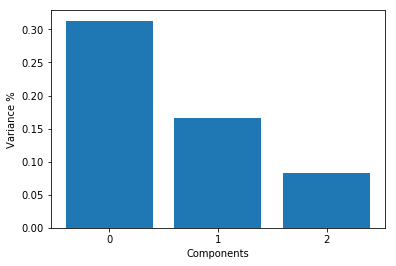

In [114]:
graph_components(X_scaled_encoded, n_components=n_comp)

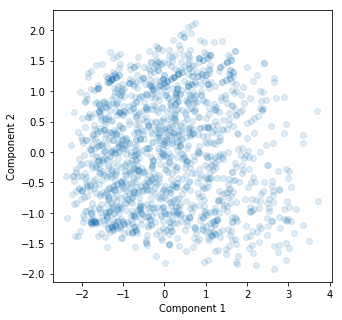

In [115]:
f = plt.figure(figsize=(5, 5))
plt.scatter(X_scaled_encoded_pca[0], X_scaled_encoded_pca[1], alpha=.14)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## True labeling

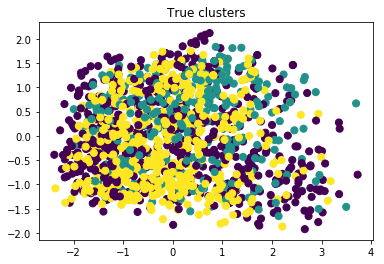

In [116]:
y = splits['y'][rows_to_remove]['class'].values

plt.scatter(X_scaled_encoded_pca.values[:, 0], X_scaled_encoded_pca.values[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('True clusters')
plt.show()

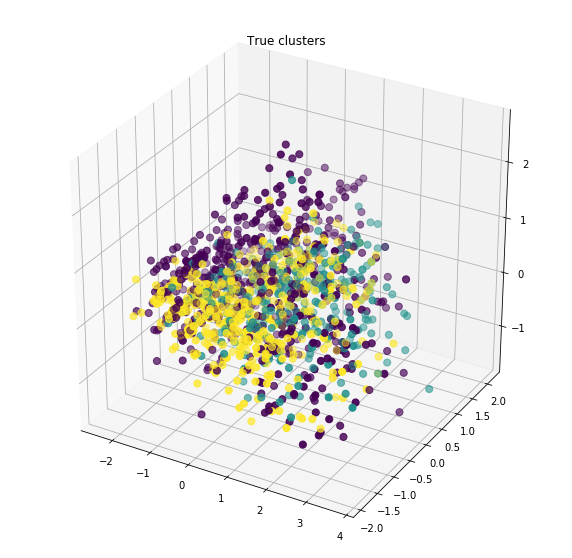

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')



x = X_scaled_encoded_pca.values[:, 0]
_y = X_scaled_encoded_pca.values[:, 1]
z = X_scaled_encoded_pca.values[:, 2]

ax.scatter(x, _y, z, c=y, s=50, cmap='viridis')
plt.title('True clusters')
plt.show()

## 2. Agglomerative Clustering with sklearn

Implement in a Python file the code that uses the AgglomerativeClustering from the
sklearn library and apply it to the data of the file. Use Euclidean and Cosine functions and
evaluate what happen when you use complete, average or single linkage.

We can see that with **affinity=cosine** and **linkage={complete, average}**, the algorithm can find better the clusters as shown in the plots.

References:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
 

https://cmry.github.io/notes/euclidean-v-cosine



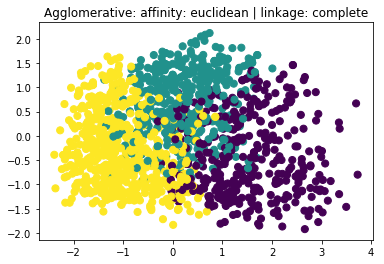

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.014540910051659629, 'purity': 0.4254295532646048, 'db': 2.1334162883145664, 'f-measure': 0.35532646048109967, 'silhouette': 0.12440311217934304}


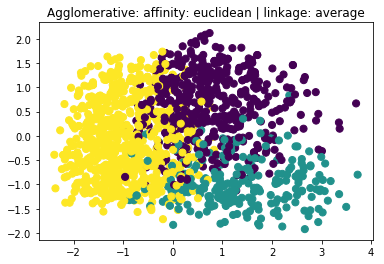

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.014191435442077488, 'purity': 0.4254295532646048, 'db': 2.0731296009494984, 'f-measure': 0.393127147766323, 'silhouette': 0.151515867936259}


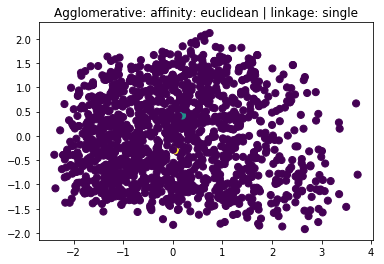

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


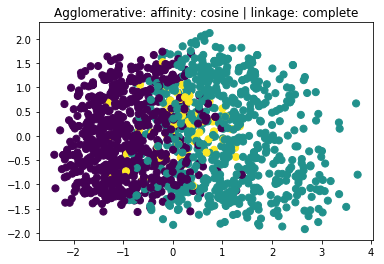

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Metrics: {'ars': 0.005644545737695806, 'purity': 0.4254295532646048, 'db': 2.3481048707744447, 'f-measure': 0.3608247422680413, 'silhouette': 0.11118393060977887}


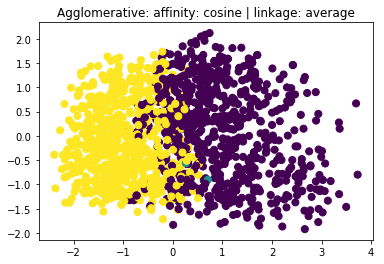

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


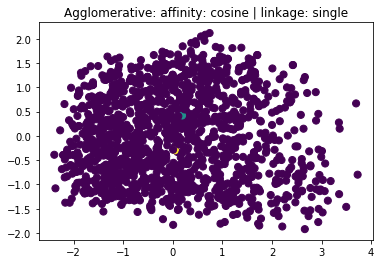

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [118]:
from sklearn.cluster import AgglomerativeClustering
from cluster.metrics import get_metrics

affinity = ['euclidean', 'cosine']
linkage = ["complete", "average", "single"]

for aff in affinity:
    for link in linkage:
        agglo = AgglomerativeClustering(affinity=aff, compute_full_tree='auto',
                                        linkage=link, memory=None, n_clusters=3,
                                        pooling_func='deprecated')
        agglo.fit(X_scaled_encoded.values)
    
        plt.scatter(X_scaled_encoded_pca.values[:, 0], X_scaled_encoded_pca.values[:, 1], c=agglo.labels_,
            s=50, cmap='viridis');

        plt.title(f'Agglomerative: affinity: {aff} | linkage: {link}')
        plt.show()
        try:
            print(f"Metrics: {get_metrics(y, agglo.labels_, X_scaled_encoded, alg='agglomerative')}")
        except:
            pass


For n_clusters = 2 The average silhouette_score is : 0.16515144368252568
For n_clusters = 3 The average silhouette_score is : 0.151515867936259
For n_clusters = 4 The average silhouette_score is : 0.1452656906250593
For n_clusters = 5 The average silhouette_score is : 0.13031058980221905
For n_clusters = 6 The average silhouette_score is : 0.12483359990187139


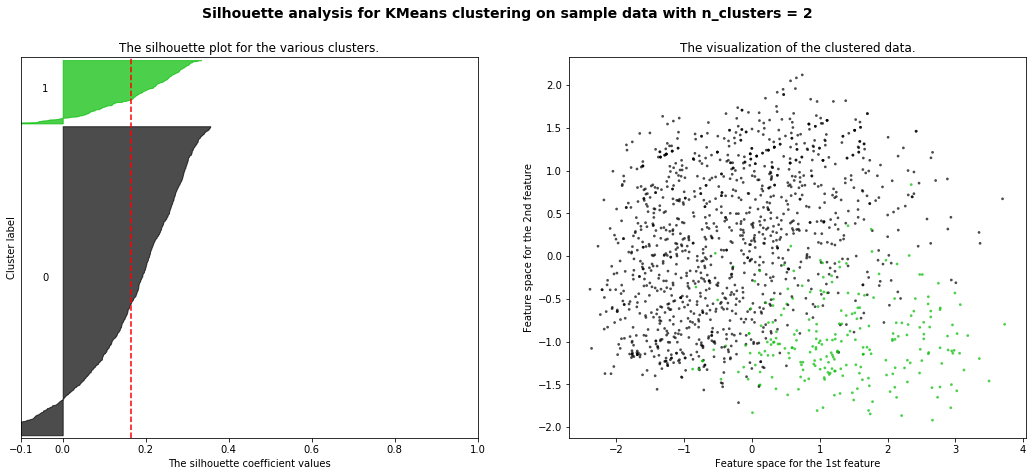

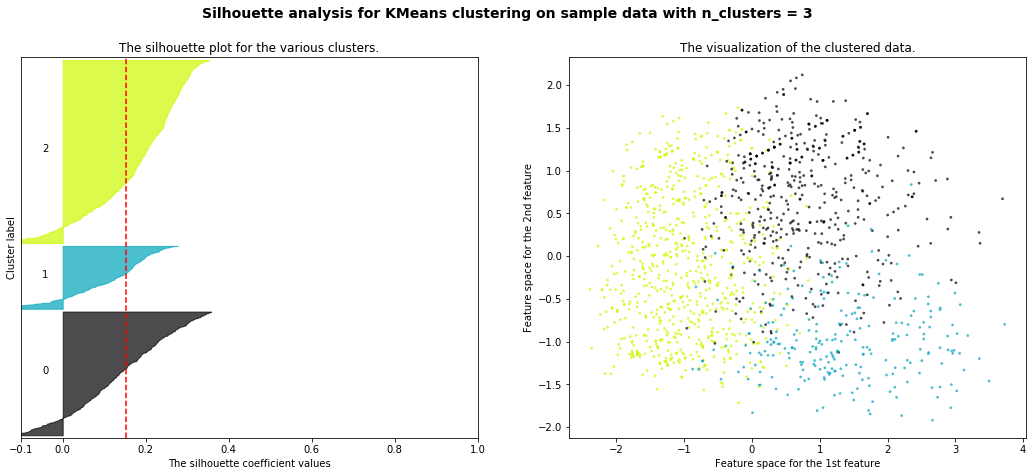

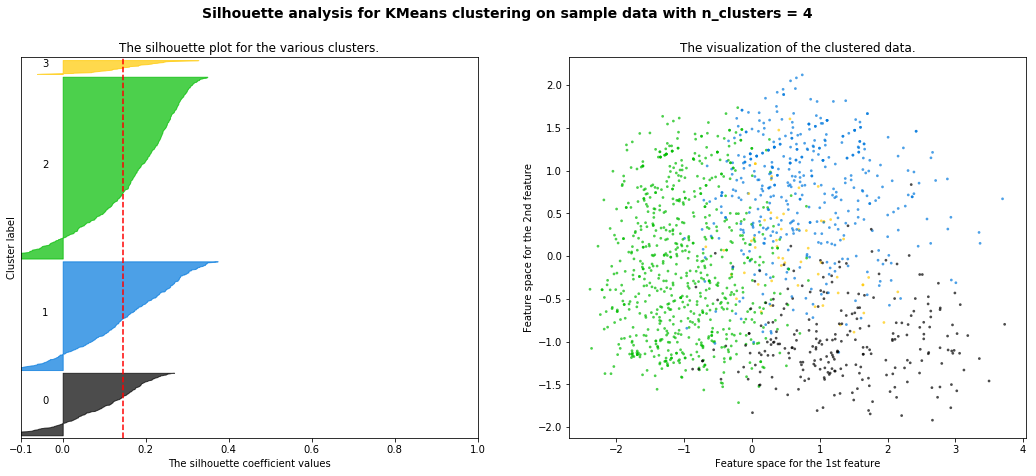

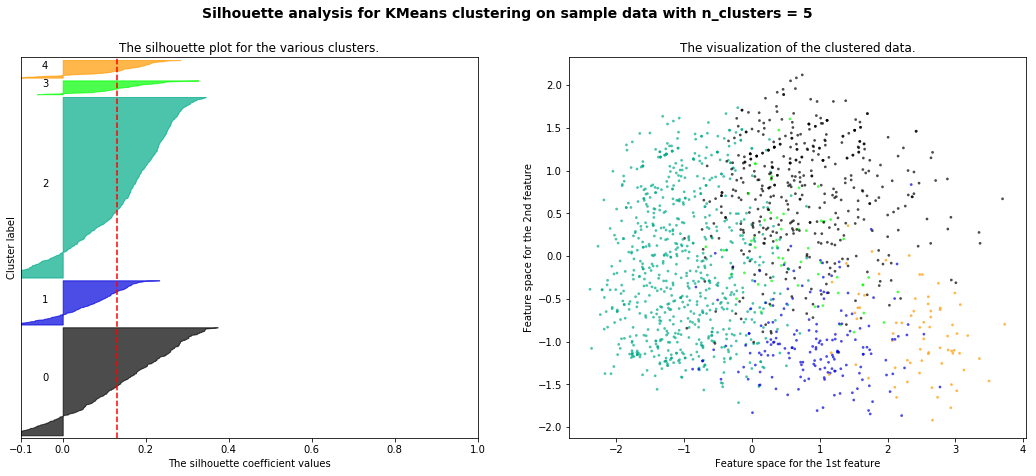

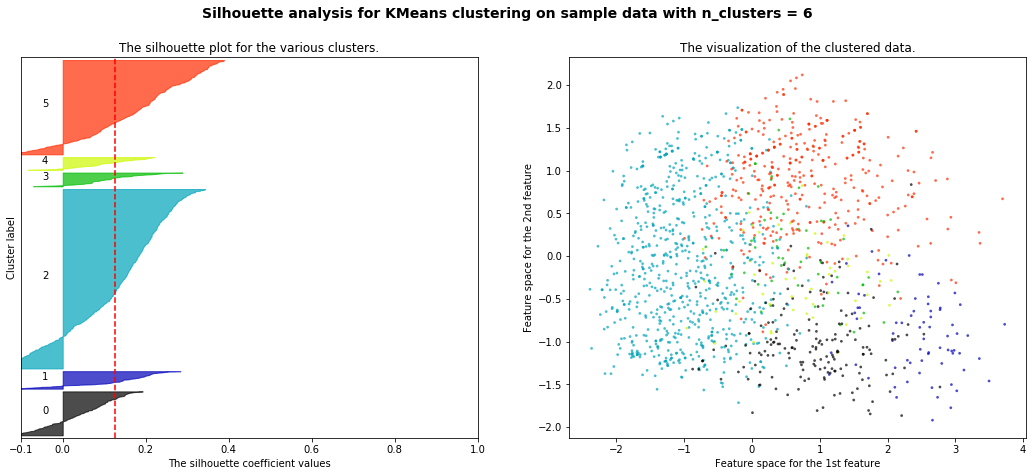

In [119]:
from cluster.metrics import silhouette

range_n_clusters = [2, 3, 4, 5, 6]
affinity = 'euclidean'
linkage = "average"
silhouette(X_scaled_encoded, X_scaled_encoded_pca, alg='agglo', 
                   agglo_params=[affinity, linkage],
                range_clusters=range_n_clusters, random_state=5)

## K-Means

Implement your own K-Means (KM) algorithm and apply it to the data of the file. Note that you are not allowed to use sklearn library.

Choose the best distance metric: euclidean, manhattan and cosine.

In [120]:
X_scaled_encoded.head()

wage  children  wreligion  wworking  media_exposure  weducation_1  \
0 -1.028389 -0.072187          1         1               0             0   
1  1.542794  3.152485          1         1               0             1   
2  1.297919  1.770483          1         1               0             0   
3  1.175482  2.691817          1         1               0             0   
4  0.440858  2.231150          1         1               0             0   

   weducation_2  weducation_3  weducation_4  heducation_2  heducation_3  \
0             1             0             0             0             1   
1             0             0             0             0             1   
2             1             0             0             0             1   
3             0             1             0             1             0   
4             0             1             0             0             1   

   heducation_4  hoccupation_1  hoccupation_2  hoccupation_3  living_index_1  \
0             0              0              1              0               0   
1             0              0              0              1               0   
2             0              0              0              1               0   
3             0              0              0              1               0   
4             0              0              0              1               0   

   living_index_2  living_index_3  living_index_4  
0               0               1               0  
1               0               0               1  
2               0               0               1  
3               0               1               0  
4               1               0               0

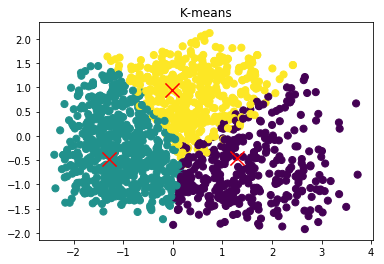

In [121]:
from cluster.kmeans import KMeans


kme = KMeans(n_clusters=3, random_state=11)
kme.fit(X_scaled_encoded.values)


# y = splits['y'][rows_to_remove].values



plt.scatter(X_scaled_encoded_pca.values[:, 0], X_scaled_encoded_pca.values[:, 1], c=kme.labels,
            s=50, cmap='viridis');

# centroids_pcs = get_components(model.centroids, n_components=0.9).values
centroids_pcs = PCA(n_components=n_comp).fit_transform(kme.centroids)

plt.scatter(centroids_pcs[:,0], centroids_pcs[:,1], marker='x', c='r', s=200);
plt.title('K-means')
plt.show()

### Clustering metrics

In [122]:
from cluster.metrics import get_metrics

get_metrics(y, kme.labels, X_scaled_encoded, alg='kmeans')

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


{'ars': 0.020386544217216886,
 'purity': 0.4254295532646048,
 'db': 1.8783650495329927,
 'f-measure': 0.37938144329896906,
 'silhouette': 0.1612884912641965}

In [123]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# x = X_scaled_encoded_pca.values[:, 0]
# y = X_scaled_encoded_pca.values[:, 1]
# z = X_scaled_encoded_pca.values[:, 2]

# ax.scatter(x, y, z, c=clusters, s=50, cmap='viridis')
# ax.scatter(model.centroids[:,0], model.centroids[:,1], model.centroids[:,2], marker='x', c='r', s=200);

# plt.show()

## Silhouette score

Negatives values mean that samples might have been assigned to the wrong cluster.
Values close to zero mean that samples are near the boundaries.
Values close to +1 mean that each cluster is far away to its neighboring cluster.

We can see that the best score goes to both n_clusters=2 and n_clusters=3. The closer to +1 the more separate are each class from each other (perfect separation).

However, apart from the score, we should take a look of thickness and size, for instance, n_clusters=4, seems the best choice, they have more or less similar size and thickness. The second with these properties is when n_clusters=3. In spite of that, the ground truth is having n_clusters=3, it means that the clustering algorithm that we chose is not best option.


For n_clusters = 2 The average silhouette_score is : 0.19097249716082418
For n_clusters = 3 The average silhouette_score is : 0.16456640040735077
For n_clusters = 4 The average silhouette_score is : 0.13605312753192
For n_clusters = 5 The average silhouette_score is : 0.13697041874134003
For n_clusters = 6 The average silhouette_score is : 0.13214474308775123


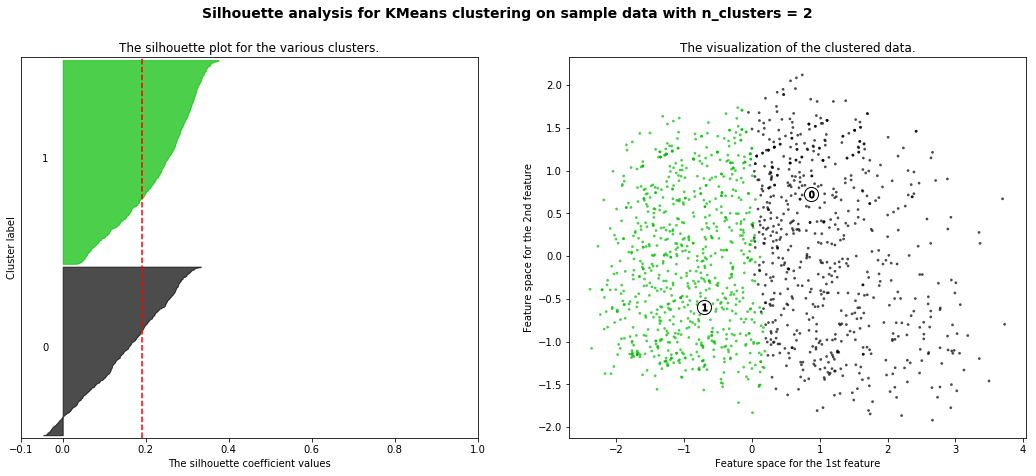

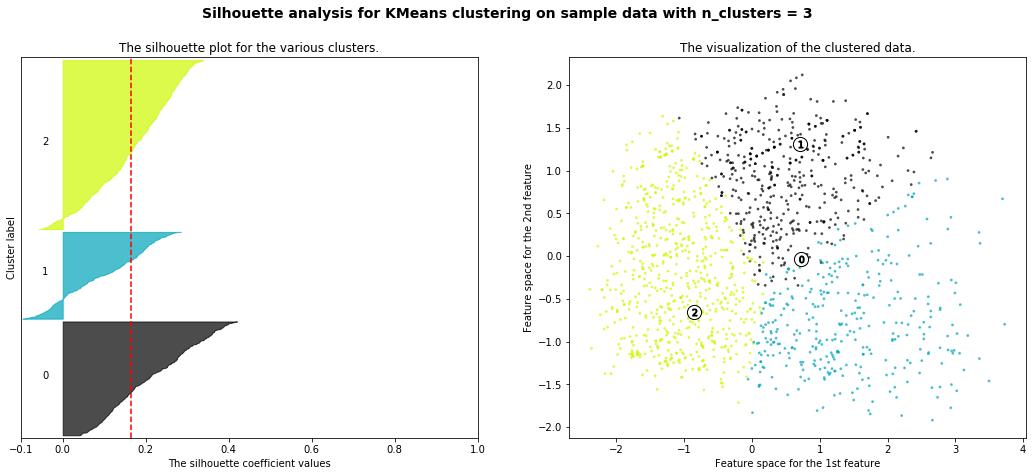

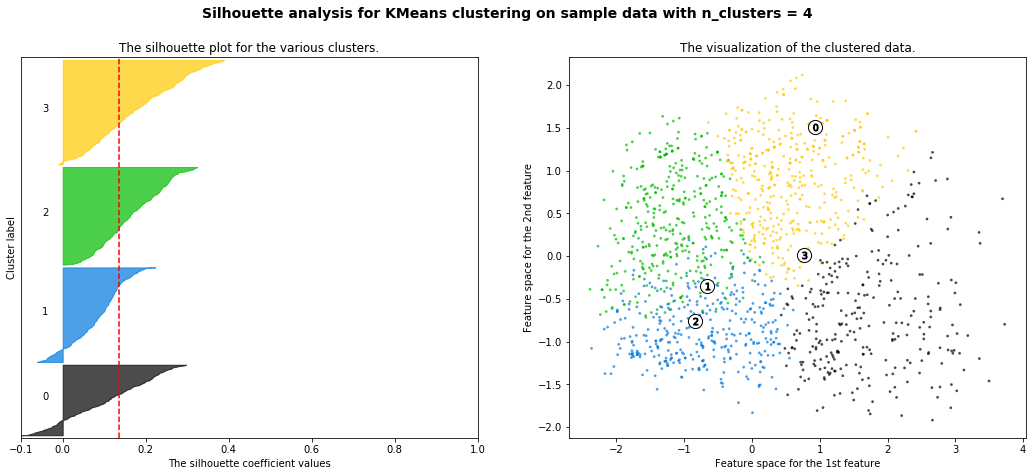

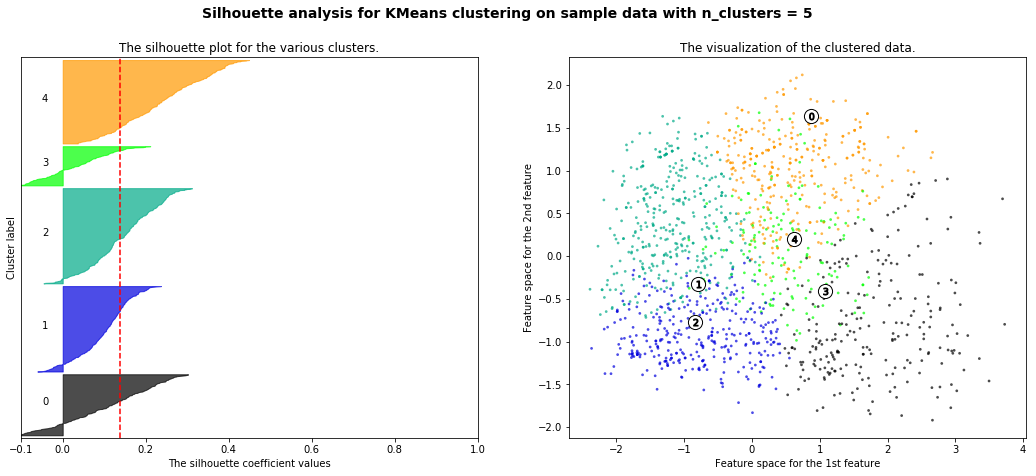

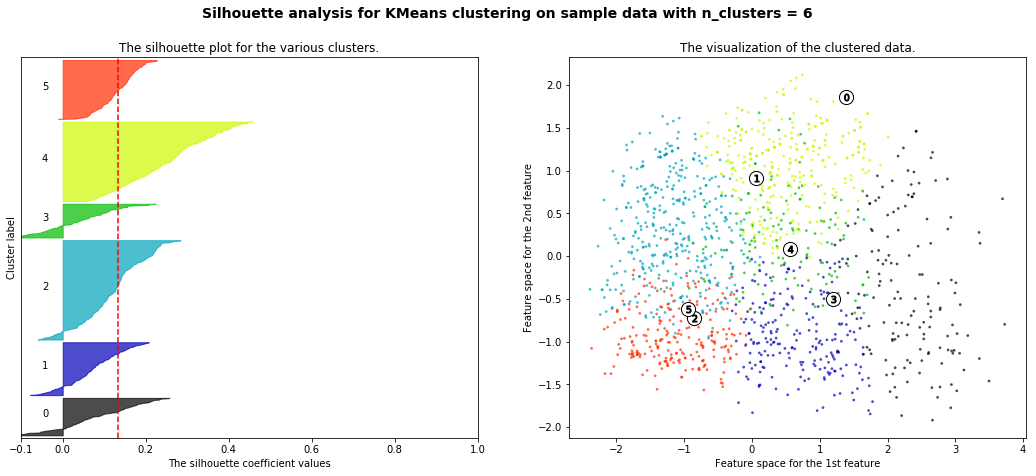

In [124]:
from cluster.metrics import silhouette

range_n_clusters = [2, 3, 4, 5, 6]

silhouette(X_scaled_encoded, X_scaled_encoded_pca, alg='kmeans', range_clusters=range_n_clusters, random_state=5)

## Elbow method

Plot errors for each k. Choose the right k when the decrease in error start being smoother.

In this case, the **k** when error start being smoother is k = 3. It's not so clear, but it's fair enought so far.

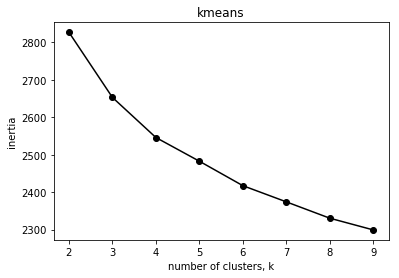

In [125]:
from cluster.metrics import elbow

range_n_clusters = range(2, 10)
elbow(X_scaled_encoded, range_n_clusters, alg='kmeans', )

# K-modes

Useful to deal with categorical features.

In [126]:
X_num_scaled_binned = prep.binning(X_num_scaled)
X_num_scaled_binned.head()

wage  children
0     0         0
1     2         2
2     2         2
3     2         2
4     1         2

In [127]:
X_scaled_binned = prep.join_features(X_num_scaled_binned, X_cat)
X_scaled_binned.head(2)

# Total features: 9


wage  children  weducation  heducation  wreligion  wworking  hoccupation  \
0     0         0           2           3          1         1            2   
1     2         2           1           3          1         1            3   

   living_index  media_exposure  
0             3               0  
1             4               0

In [128]:
n_comp = 3
X_scaled_binned_pca = PCA(n_components=n_comp).fit_transform(X_scaled_binned.values)
X_scaled_binned_pca = pd.DataFrame(X_scaled_binned_pca)
X_scaled_binned_pca.head()

0         1         2
0  0.860737 -0.492935 -0.487190
1  1.435850  2.288789 -0.908045
2  0.795016  1.955424 -0.677069
3  1.068871  1.374995  0.213191
4  1.220488  0.110930  0.708685

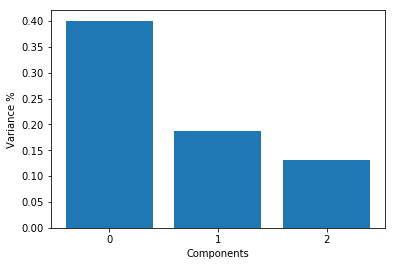

In [129]:
graph_components(X_scaled_binned, n_components=n_comp)

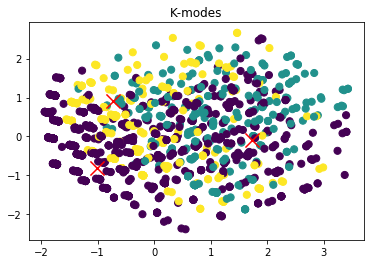

In [130]:
from cluster.kmodes import KModes

km = KModes(n_clusters=3, random_state=10)
km.fit(X_scaled_binned.values)

plt.scatter(X_scaled_binned_pca.values[:, 0], X_scaled_binned_pca.values[:, 1], c=km.labels,
            s=50, cmap='viridis');

centroids_pca = PCA(n_components=n_comp).fit_transform(km.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-modes')
plt.show()

In [131]:
from cluster.metrics import get_metrics

get_metrics(y, km.labels, X_scaled_binned, alg='kmodes')

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


{'ars': -0.010188632511533988,
 'purity': 0.4254295532646048,
 'db': 5.096371280331112,
 'f-measure': 0.3237113402061856,
 'silhouette': 0.06728992584538385}

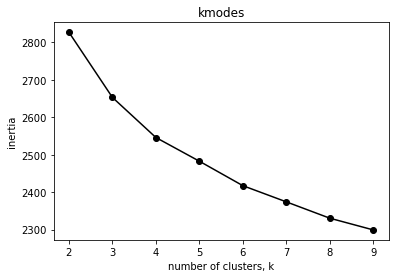

In [132]:
elbow(X_scaled_encoded, range_n_clusters, alg='kmodes', )

## Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.2773327255831818
For n_clusters = 3 The average silhouette_score is : 0.1563185002265356
For n_clusters = 4 The average silhouette_score is : 0.08044199345610087
For n_clusters = 5 The average silhouette_score is : 0.05613970252122326
For n_clusters = 6 The average silhouette_score is : 0.05525343248839009


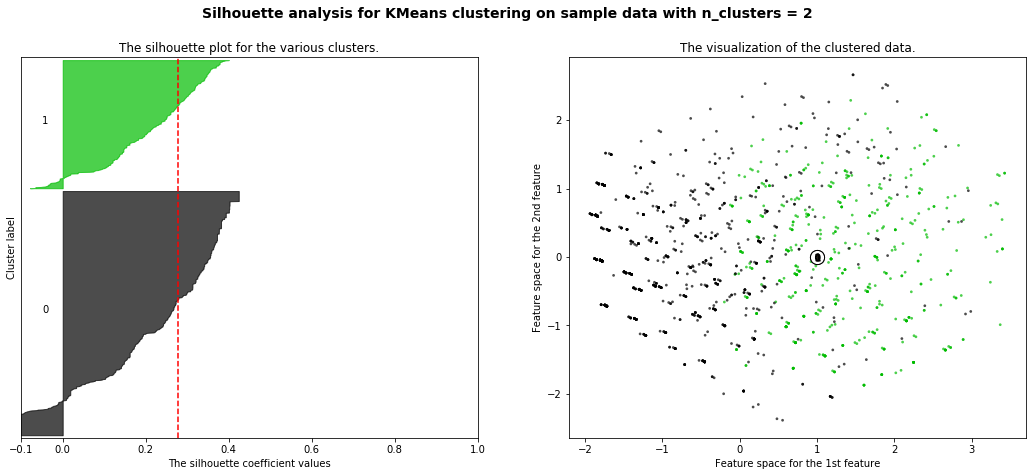

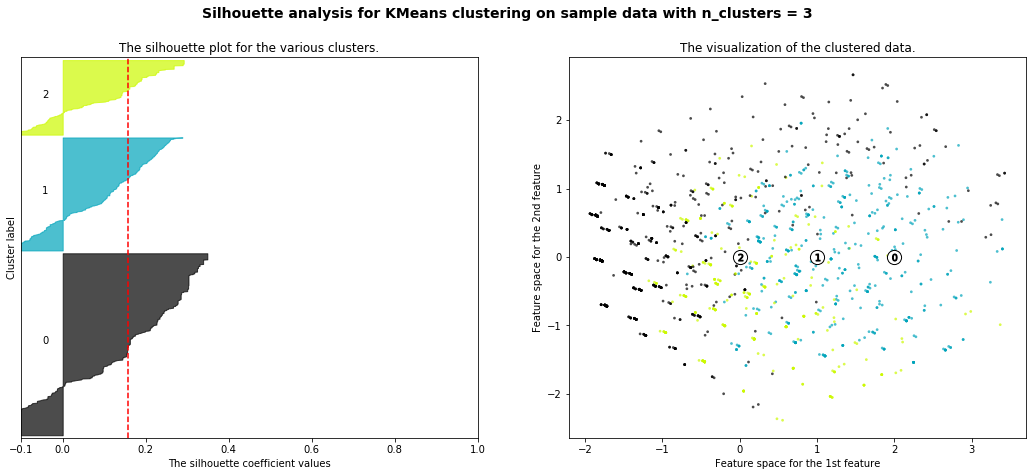

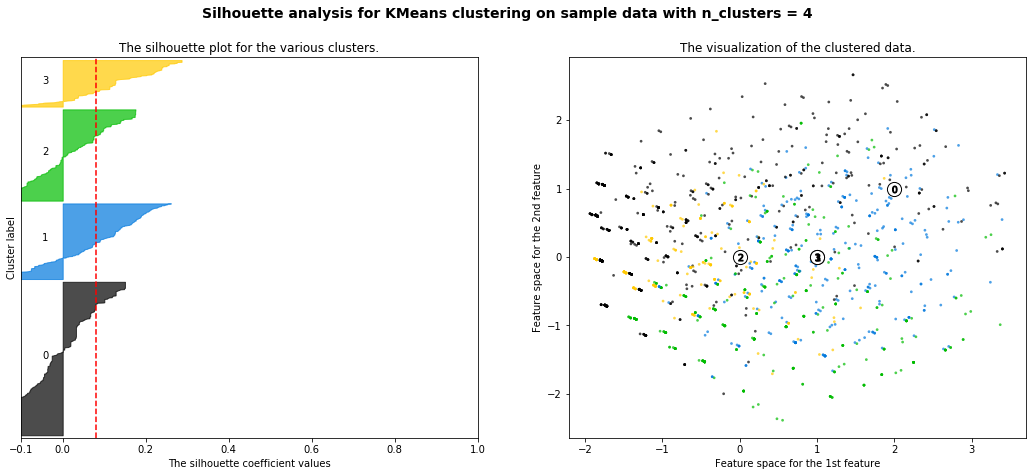

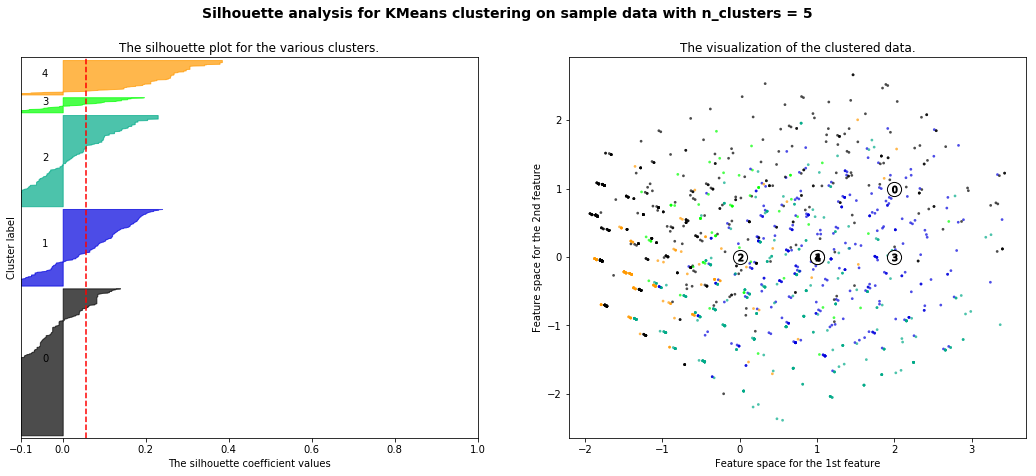

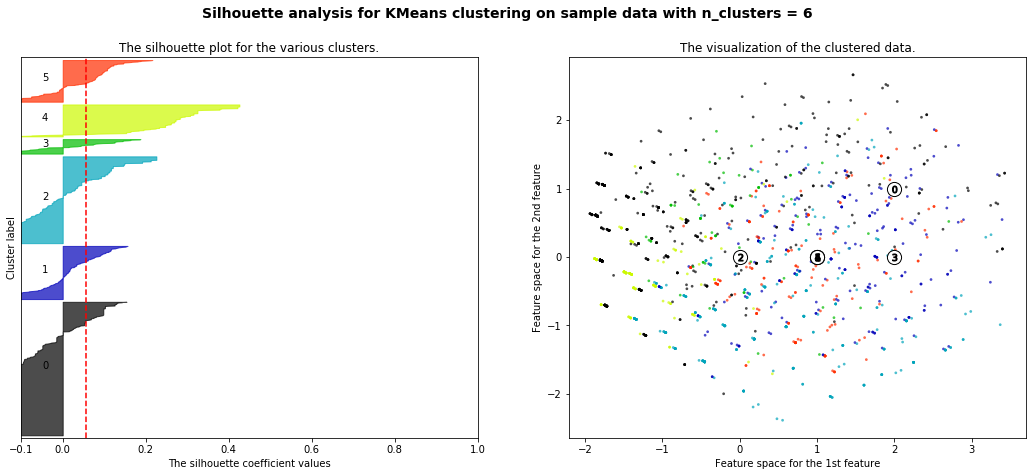

In [133]:
from cluster.metrics import silhouette

range_n_clusters = [2, 3, 4, 5, 6]

silhouette(X_scaled_binned, X_scaled_binned_pca, alg='kmodes', range_clusters=range_n_clusters, random_state=5)

In [134]:
# !pip install kmodes

In [135]:
# from kmodes.kmodes import KModes

# km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)

# clusters = km.fit_predict(X_scaled.values)
# centroids = km.cluster_centroids_
# plt.scatter(X_scaled_pca.values[:, 0], X_scaled_pca.values[:, 1], c=clusters,
#             s=50, cmap='viridis');
# plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='g', s=200);

## K-prototypes

The idea here is to average the kmeans distance and the kmodes distances with a factor of weight, gamma.
Then, update the centroids.

$$d\left(X_{i}, C_{j}\right)=d_{r}\left(X_{i}, C_{j}\right)+\gamma d_{c}\left(X_{i}, C_{j}\right)$$

$$d_{r}\left(X_{i}, C_{j}\right)=\sum_{l=1}^{p}\left|x_{i l}-c_{j l}\right|^{2}$$
$$d_{c}\left(X_{i}, C_{j}\right)=\sum_{l=p+1}^{m} \delta\left(x_{i l}, c_{j l}\right)$$
$$\delta\left(x_{i l}, c_{j l}\right)=\left\{\begin{array}{ll}{0,} & {\text { when } \quad x_{i l}=c_{j l}} \\ {1,} & {\text { when } \quad x_{i l} \neq c_{j l}}\end{array}\right.$$

source:

A Fast K-prototypes Algorithm Using Partial
Distance Computation. Byoungwook Kim

In [136]:
X_scaled = prep.join_features(X_num_scaled, X_cat)
X_scaled.head(2)
X_scaled.head()

# Total features: 9


wage  children  weducation  heducation  wreligion  wworking  \
0 -1.028389 -0.072187           2           3          1         1   
1  1.542794  3.152485           1           3          1         1   
2  1.297919  1.770483           2           3          1         1   
3  1.175482  2.691817           3           2          1         1   
4  0.440858  2.231150           3           3          1         1   

   hoccupation  living_index  media_exposure  
0            2             3               0  
1            3             4               0  
2            3             4               0  
3            3             3               0  
4            3             2               0

In [137]:
n_comp = 3
pca = PCA(n_components=n_comp)
X_scaled_pca = pca.fit_transform(X_scaled.values)
X_scaled_pca = pd.DataFrame(X_scaled_pca)
X_scaled_pca.head()

0         1         2
0  0.831405 -0.732310 -0.371781
1  2.042630  3.263547 -1.110446
2  1.104961  2.155656 -0.997279
3  1.551114  2.413844  0.261338
4  1.518777  1.341605  1.120379

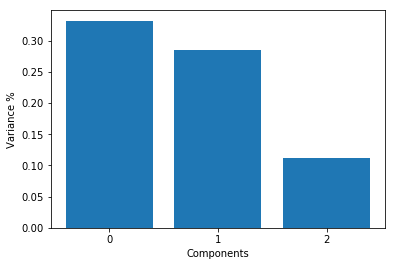

In [138]:
graph_components(X_scaled, n_components=n_comp)

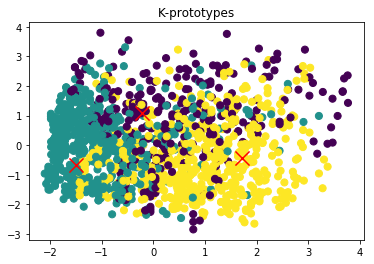

In [139]:
from cluster.kprototypes import KPrototypes

cat_features = list(range(2, len(X_scaled.columns)))
kp = KPrototypes(n_clusters=3, cat_features=cat_features, random_state=5)
kp.fit(X_scaled.values)

plt.scatter(X_scaled_pca.values[:, 0], X_scaled_pca.values[:, 1], c=kp.labels,
            s=50, cmap='viridis');

centroids_pca = PCA(n_components=n_comp).fit_transform(kp.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-prototypes')
plt.show()

In [140]:
from cluster.metrics import get_metrics

get_metrics(y, kp.labels, X_scaled, alg='kproto')

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


{'ars': 0.014543366722938824,
 'purity': 0.4254295532646048,
 'db': 2.6558927923284785,
 'f-measure': 0.36907216494845363,
 'silhouette': 0.14735222081676375}

In [141]:
range_n_clusters = range(1, 7)

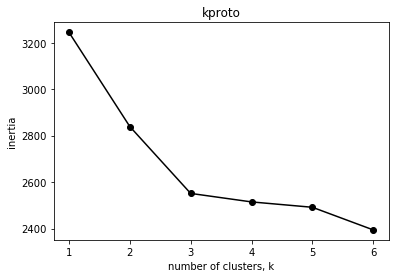

In [142]:
elbow(X_scaled, range_n_clusters, alg='kproto', )

## Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.11640433895725404
For n_clusters = 3 The average silhouette_score is : 0.14735222081676375
For n_clusters = 4 The average silhouette_score is : 0.0695707455866934
For n_clusters = 5 The average silhouette_score is : 0.1217374480406897
For n_clusters = 6 The average silhouette_score is : 0.12286397011103199


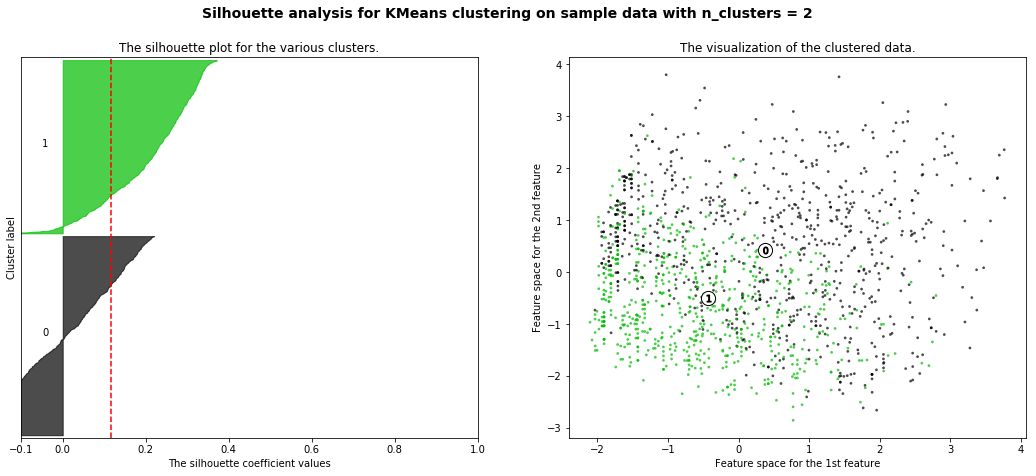

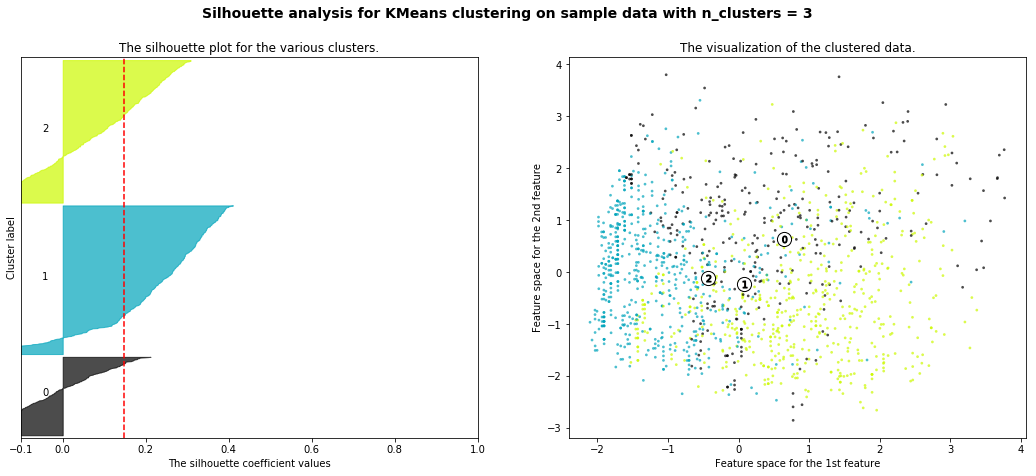

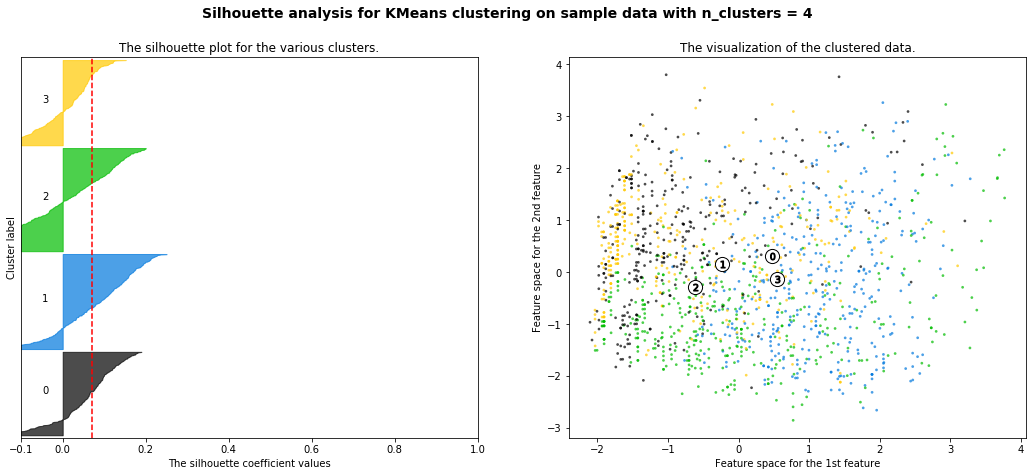

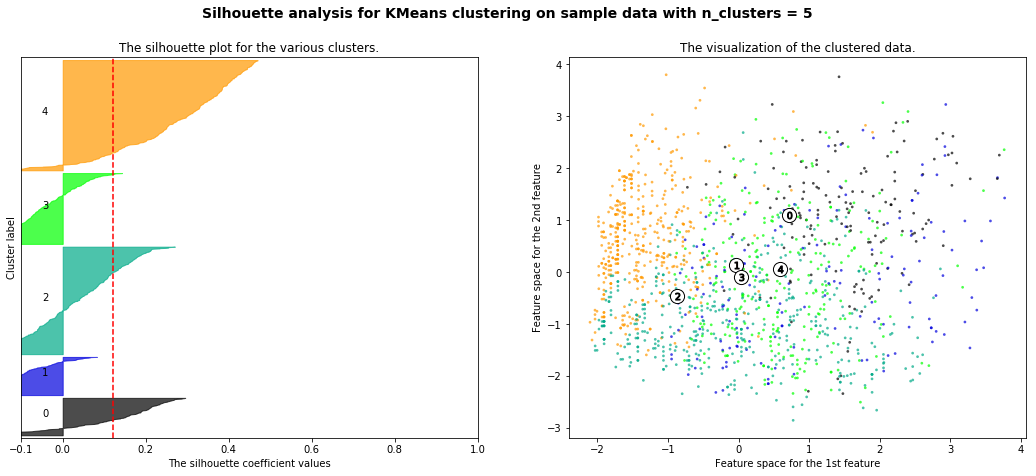

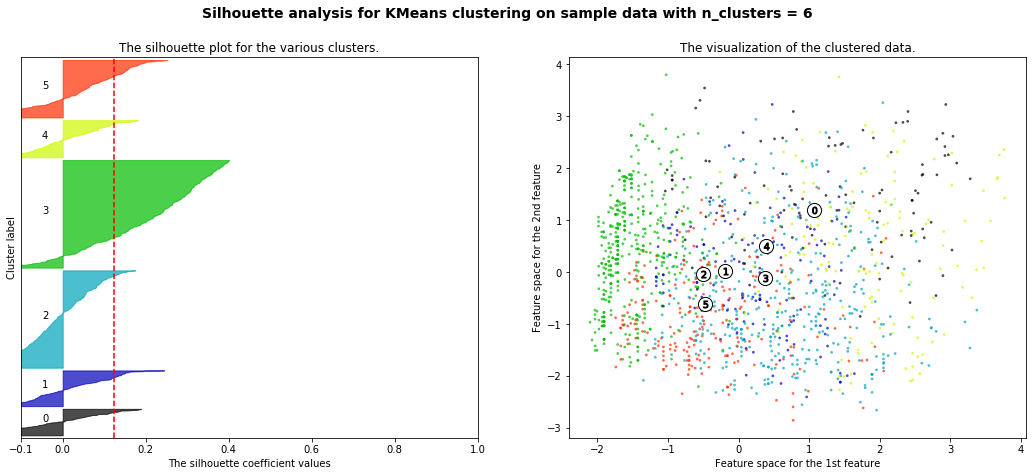

In [143]:
from cluster.metrics import silhouette

cat_features = list(range(2, len(X_scaled.columns)))
range_n_clusters = [2, 3, 4, 5, 6]

silhouette(X_scaled, X_scaled_pca, cat_features=cat_features,
           alg='kproto', range_clusters=range_n_clusters, random_state=5)

In [144]:
# from kmodes.kprototypes import KPrototypes

# kp = KPrototypes(n_clusters=3, init='Huang', n_init=10, verbose=0)

# cat_indexes = list(range(2, len(X_scaled.columns)))
# clusters = kp.fit_predict(X_scaled.values, categorical=cat_indexes)
# centroids = kp.cluster_centroids_

# plt.scatter(X_scaled_pca.values[:, 0], X_scaled_pca.values[:, 1], c=clusters,
#             s=50, cmap='viridis');
# plt.scatter(centroids[0][0], centroids[0][1], marker='x', c='r', s=200);

In [145]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# x = X_scaled_pca.values[:, 0]
# y = X_scaled_pca.values[:, 1]
# z = X_scaled_pca.values[:, 2]

# ax.scatter(x, y, z, c=kp.labels, s=50, cmap='viridis')
# ax.scatter(kp.centroids[:,0], kp.centroids[:,1], kp.centroids[:,2], marker='x', c='r', s=200);
# # ax.scatter(centroids[0][0], centroids[0][1], centroids[0][2], marker='x', c='r', s=200);

# plt.show()

In [146]:
# best random state
from cluster.kprototypes import KPrototypes
from sklearn.metrics import adjusted_rand_score


best_clusters = None
best_centroids = None
best_r = None
best_score = -9999
for r in range(20):
    kp = KPrototypes(n_clusters=3, random_state=r)
    kp.fit(X_scaled.values)
    score = adjusted_rand_score(y, kp.labels)
    if score > best_score:
        best_clusters = kme.labels
        best_centroids = kme.centroids
        best_score = score
        best_r = r
fcm_clusters = best_clusters
print('Best score:',best_score)
print('Best random state value:',best_r)

Best score: 0.05814182828140659
Best random state value: 13


# Fuzzy c-means

In [147]:
X_scaled_encoded.head()

wage  children  wreligion  wworking  media_exposure  weducation_1  \
0 -1.028389 -0.072187          1         1               0             0   
1  1.542794  3.152485          1         1               0             1   
2  1.297919  1.770483          1         1               0             0   
3  1.175482  2.691817          1         1               0             0   
4  0.440858  2.231150          1         1               0             0   

   weducation_2  weducation_3  weducation_4  heducation_2  heducation_3  \
0             1             0             0             0             1   
1             0             0             0             0             1   
2             1             0             0             0             1   
3             0             1             0             1             0   
4             0             1             0             0             1   

   heducation_4  hoccupation_1  hoccupation_2  hoccupation_3  living_index_1  \
0             0              0              1              0               0   
1             0              0              0              1               0   
2             0              0              0              1               0   
3             0              0              0              1               0   
4             0              0              0              1               0   

   living_index_2  living_index_3  living_index_4  
0               0               1               0  
1               0               0               1  
2               0               0               1  
3               0               1               0  
4               1               0               0

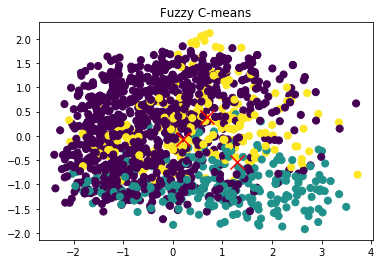

In [148]:
from cluster.fuzzycmeans import FuzzyCMeans


fcm = FuzzyCMeans(n_clusters=3, random_state=10)
fcm.fit(X_scaled_encoded.values)

plt.scatter(X_scaled_encoded_pca.values[:, 0], X_scaled_encoded_pca.values[:, 1], c=fcm.labels,
            s=50, cmap='viridis');
centroids_pca = PCA(n_components=n_comp).fit_transform(fcm.centroids)
plt.scatter(fcm.centroids[:,0], fcm.centroids[:,1], marker='x', c='r', s=200);
plt.title('Fuzzy C-means')
plt.show()

In [149]:
from cluster.metrics import get_metrics

get_metrics(y, fcm.labels, X_scaled_encoded, alg='fuzzy')

/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


{'ars': -0.004092486669994505,
 'purity': 0.4439862542955326,
 'db': 2.7917336163099975,
 'f-measure': 0.30034364261168384,
 'silhouette': 0.08919125206555296}

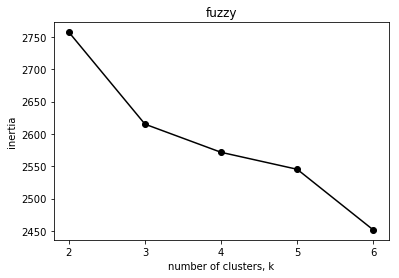

In [150]:
elbow(X_scaled_encoded, range_n_clusters, alg='fuzzy', )

## Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.1379125028870482
For n_clusters = 3 The average silhouette_score is : 0.12581654194493933
For n_clusters = 4 The average silhouette_score is : 0.10236871902180084
For n_clusters = 5 The average silhouette_score is : 0.08550021907486252
For n_clusters = 6 The average silhouette_score is : 0.06280183611939495


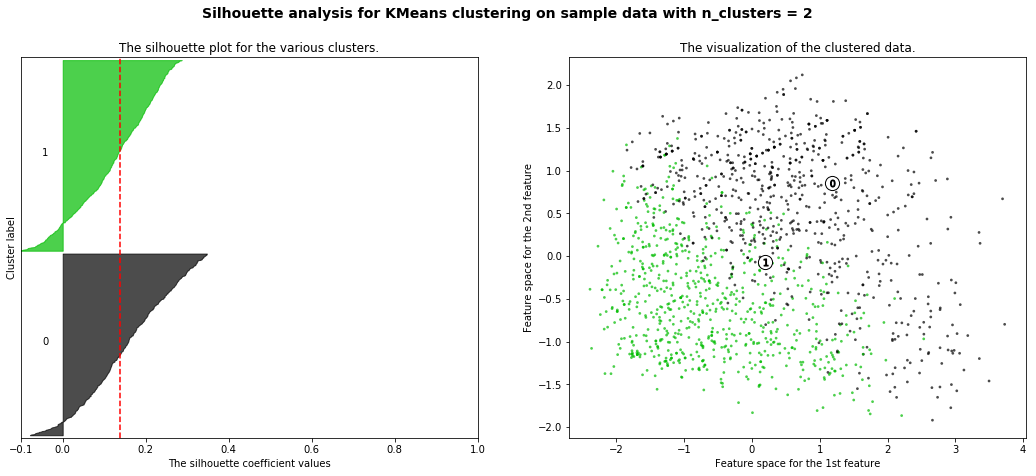

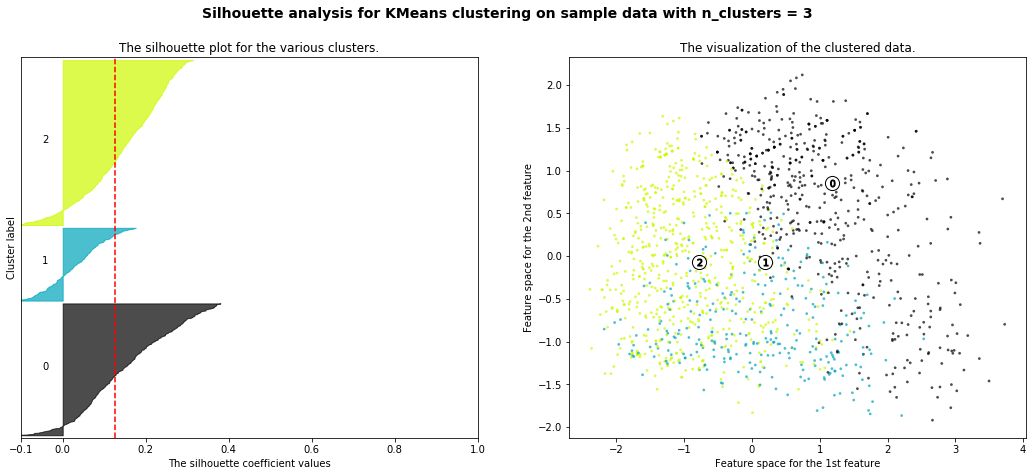

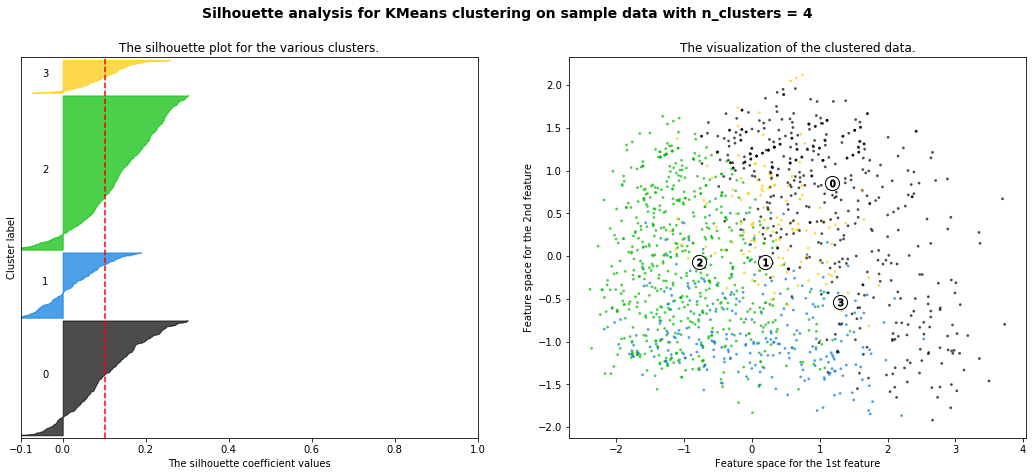

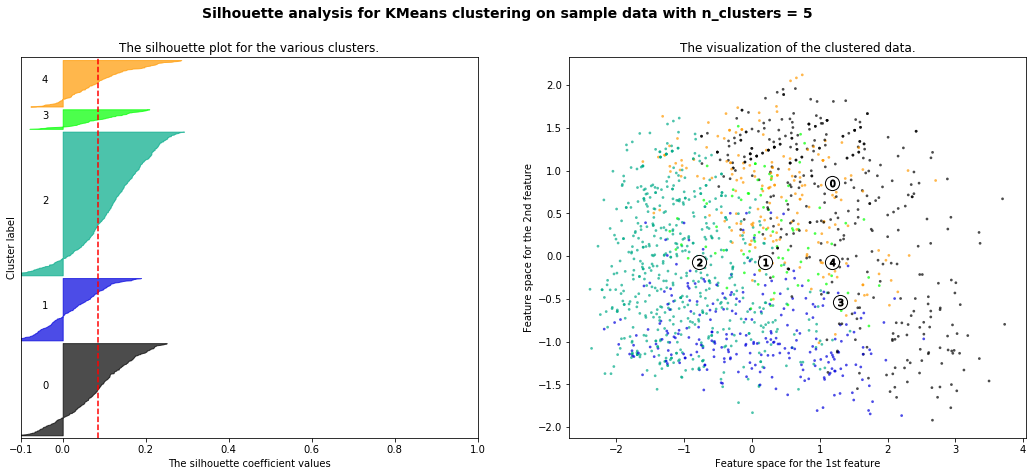

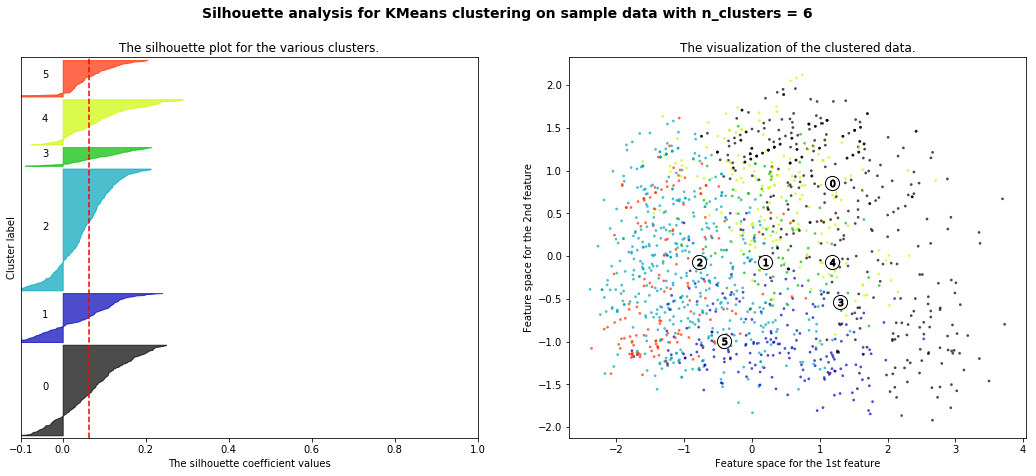

In [151]:
from cluster.metrics import silhouette

range_n_clusters = [2, 3, 4, 5, 6]

silhouette(X_scaled_encoded, X_scaled_encoded_pca, alg='fuzzy', range_clusters=range_n_clusters, random_state=5)

**Validation Fuzzy C means**

In [152]:
# The membership matrix which contains the degree of belonging to the different clusters first needs to be normalized 
# to 1 for the maximum degree value else 0. Next, the label of each datapoint is associated depending to which cluster
# it belong each datapoint. 

import numpy as np
def U_normalized(U):
    """
    This function de-fuzzifies the U. It replace the max value of each data point list for a 1 and the others are
    replaced by 0.
  """
    for i in range(0, len(U)):
        maximum = max(U[i])
        for j in range(0, len(U[0])):
            if U[i][j] != maximum:
                U[i][j] = 0
            else:
                U[i][j] = 1
    return U


def clusters_fcm(Un):
    """
    This function computes an array with the assigned cluster of each datapoint after performing the FCM algorithm.
    """
    clust = []
    for i in range(len(Un)):
        if Un[i][0] == 1:
            clust.append(0)
        else:
            clust.append(1)

    return np.array(clust)

In [153]:
# metrics FCM
from cluster.metrics import get_metrics

# CLASS to categorical
print(get_metrics(y, fcm.labels, X_scaled_encoded, alg='fuzzy'))

{'ars': -0.004092486669994505, 'purity': 0.4439862542955326, 'db': 2.7917336163099975, 'f-measure': 0.30034364261168384, 'silhouette': 0.08919125206555296}


/home/guess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [154]:
from sklearn.metrics import silhouette_score
from cluster.fuzzycmeans import FuzzyCMeans2
for k in range(2,10):
    fcm = FuzzyCMeans2(n_clusters = k,random_state = 0,m = 2,max_iter = 100,toleration = 0.01)
    fcm.fit(X_scaled_encoded.values)
    U = fcm.U
    Un = U_normalized(U)
    clusters = clusters_fcm(Un)
    print('Number of clusters FCM =',k,'--> Silhouette score:',silhouette_score(X_num_scaled,clusters))

Number of clusters FCM = 2 --> Silhouette score: 0.3126731535974104
Number of clusters FCM = 3 --> Silhouette score: 0.4233947776677048
Number of clusters FCM = 4 --> Silhouette score: -0.08163953354507641
Number of clusters FCM = 5 --> Silhouette score: -0.19026271764569305
Number of clusters FCM = 6 --> Silhouette score: 0.009955579844400677
Number of clusters FCM = 7 --> Silhouette score: 0.2992193434447444
Number of clusters FCM = 8 --> Silhouette score: -0.17500551750168422
Number of clusters FCM = 9 --> Silhouette score: -0.0015454156721157605
